# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 22: Logarithmic Mean Risk Optimization (Kelly Criterion)

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2000-01-01'
end = '2019-12-31'

# Tickers of assets
assets = ['AIG', 'AKAM', 'ALXN', 'AMT', 'APA', 'BA', 'BAX', 'BKNG',
          'BMY', 'CMCSA', 'CNP', 'CPB', 'DE', 'MO', 'MSFT', 'NI',
          'NKTR', 'NTAP', 'PCAR', 'PSA', 'REGN', 'SBAC', 'SEE', 'T',
          'TGT', 'TMO', 'TTWO']

assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  27 of 27 completed


In [2]:
# Calculating returns

#Y = data[assets].pct_change().dropna()
Y = data[assets].copy()
Y = Y.resample('M').last().pct_change().dropna()
print(Y.shape)
display(Y.head())

(239, 27)


,AIG,AKAM,ALXN,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-29,-15.2694%,4.8670%,94.8571%,37.2822%,0.0000%,-16.7100%,-14.6771%,-3.5560%,-13.5849%,-7.2464%,...,88.0449%,4.6443%,-2.7549%,358.8832%,33.6082%,-11.4699%,-11.9534%,-10.2961%,-9.7473%,0.0000%
2000-03-31,23.8863%,-38.4450%,-18.1818%,0.2538%,36.5171%,2.3689%,15.0230%,43.0168%,-0.2184%,3.1250%,...,-12.3179%,16.1103%,-3.8081%,-47.6770%,8.6420%,9.3082%,11.5894%,26.6949%,30.4000%,6.5327%
2000-04-30,0.1713%,-38.5154%,-36.0215%,-5.6962%,-2.6382%,4.9587%,8.5878%,-20.9375%,-7.8650%,-5.4546%,...,-10.6496%,-4.8750%,6.5476%,-3.3827%,-7.6705%,2.4165%,4.5795%,-10.9532%,-4.9080%,-27.3585%
2000-05-31,2.6661%,-32.4905%,-16.6667%,-20.2685%,25.6129%,-1.2138%,2.1113%,-39.7233%,5.0060%,-3.6859%,...,-12.6796%,-11.3613%,-0.2793%,-28.6652%,-8.3077%,0.6742%,-0.2853%,-5.6896%,-4.1936%,-5.8442%
2000-06-30,4.3865%,77.8792%,92.2689%,12.2896%,-3.3385%,7.0399%,5.7331%,-0.3689%,5.7888%,3.4941%,...,24.6854%,-5.2239%,6.1300%,46.3190%,39.4296%,-6.4732%,0.7154%,-7.4775%,13.4680%,33.7931%


## 2. Estimating Logarithmic Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Risk Adjusted Return.

In [3]:
import riskfolio.Portfolio as pf

# Building the portfolio object
port = pf.Portfolio(returns=Y)
# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

port.solvers = ['MOSEK']
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w_1 = port.optimization(model=model, rm=rm, obj=obj, kelly=False, rf=rf, l=l, hist=hist)
w_2 = port.optimization(model=model, rm=rm, obj=obj, kelly='approx', rf=rf, l=l, hist=hist)
w_3 = port.optimization(model=model, rm=rm, obj=obj, kelly='exact', rf=rf, l=l, hist=hist)

w = pd.concat([w_1, w_2, w_3], axis=1)
w.columns = ['Arithmetic', 'Log Approx', 'Log Exact']

display(w)

,Arithmetic,Log Approx,Log Exact
AIG,0.0000%,0.0000%,0.0000%
AKAM,0.0000%,0.0000%,0.0000%
ALXN,3.3014%,3.3321%,3.3409%
AMT,0.0000%,0.0001%,0.0000%
APA,0.0000%,0.0000%,0.0000%
BA,0.6165%,0.5924%,0.5881%
BAX,0.6798%,1.2922%,1.3223%
BKNG,2.9275%,2.8005%,2.8085%
BMY,0.0000%,0.0017%,0.0000%
CMCSA,0.0000%,0.0000%,0.0000%


<AxesSubplot:>

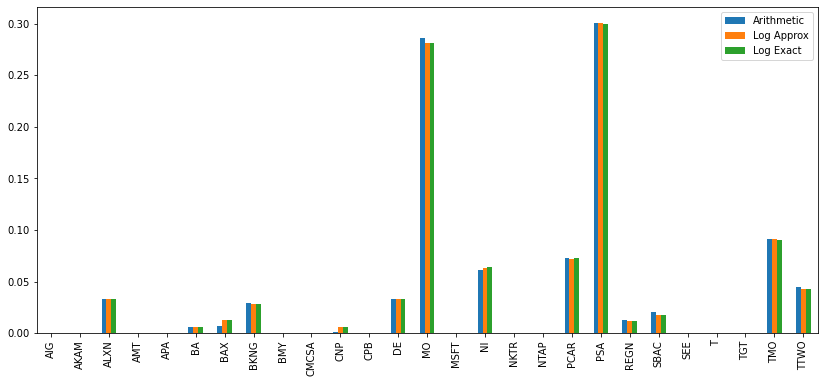

In [4]:
fig, ax = plt.subplots(figsize=(14,6))
w.plot(kind='bar', ax = ax)

In [5]:
import riskfolio.RiskFunctions as rk

returns = port.returns
cov = port.cov

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy()))
x = rk.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Risk Adjusted Return:")
print("Arithmetic", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy()))
x = rk.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Approx", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_3.to_numpy()))
x = rk.Sharpe_Risk(w_3, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Exact", (y/x).item() * 12**0.5)

Risk Adjusted Return:
Arithmetic 1.2777609920263315
Log Approx 1.2780908644682214
Log Exact 1.2780962788021772


### 2.2 Calculate efficient frontier

In [6]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, kelly="exact", points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AIG,AKAM,ALXN,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
0,0.0000%,0.0000%,0.4605%,0.0000%,0.9714%,0.0000%,6.4388%,0.0000%,8.7157%,4.2748%,...,0.0000%,0.0476%,21.9683%,0.8016%,0.0000%,0.0000%,8.8771%,2.8017%,1.1746%,1.8656%
1,0.0000%,0.0000%,2.7487%,0.0000%,0.0000%,0.0000%,3.9647%,1.8393%,4.6034%,0.0000%,...,0.0000%,5.3799%,27.6810%,0.8600%,0.2902%,0.0000%,1.6299%,1.0729%,6.9863%,3.0699%
2,0.0000%,0.0000%,3.2927%,0.0000%,0.0000%,0.3181%,2.2990%,2.5943%,1.4850%,0.0000%,...,0.0000%,7.0998%,29.7212%,1.0118%,1.4038%,0.0000%,0.0000%,0.0000%,8.8272%,3.8982%
3,0.0000%,0.0000%,3.0515%,0.0000%,0.0000%,0.1497%,0.0000%,3.4494%,0.0000%,0.0000%,...,0.0000%,7.4394%,30.1212%,1.7689%,2.9496%,0.0000%,0.0000%,0.0000%,8.5452%,5.7016%
4,0.0000%,0.0000%,2.4221%,0.0000%,0.0000%,0.0000%,0.0000%,4.3453%,0.0000%,0.0000%,...,0.0000%,7.4373%,29.3928%,2.7135%,4.4188%,0.0000%,0.0000%,0.0000%,7.0028%,7.5957%


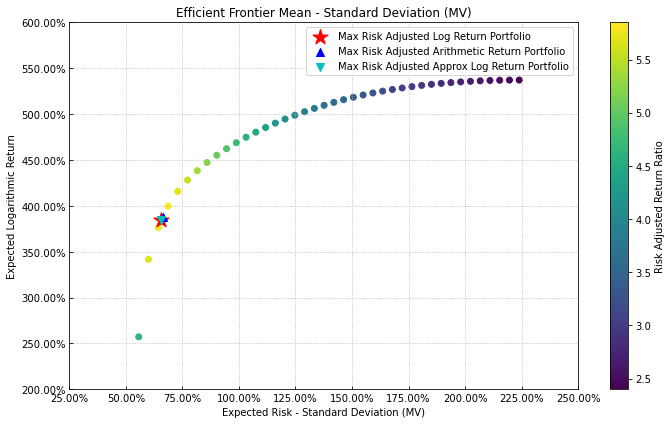

In [7]:
import riskfolio.PlotFunctions as plf

# Plotting the efficient frontier

label = 'Max Risk Adjusted Log Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

fig, ax = plt.subplots(figsize=(10,6))
plf.plot_frontier(w_frontier=frontier,
                       mu=mu,
                       cov=cov,
                       returns=returns,
                       rm=rm,
                       kelly=True,
                       rf=rf,
                       alpha=0.05,
                       cmap='viridis',
                       w=w_2,
                       label=label,
                       marker='*',
                       s=16,
                       c='r',
                       height=6,
                       width=10,
                       ax=ax)

y1 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy())) * 252 
x1 = rk.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 252**0.5

y2 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy())) * 252 
x2 = rk.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 252**0.5

ax.scatter(x=x1,
           y=y1,
           marker="^",
           s=8**2,
           c="b",
           label="Max Risk Adjusted Arithmetic Return Portfolio")
ax.scatter(x=x2,
           y=y2,
           marker="v",
           s=8**2,
           c="c",
           label="Max Risk Adjusted Approx Log Return Portfolio")
plt.legend()

## 2. Estimating Logarithmic Mean EVaR Portfolios

### 2.1 Calculating the portfolio that maximizes Risk Adjusted Return.

In [8]:
rm = 'EVaR' # Risk measure

w_1 = port.optimization(model=model, rm=rm, obj=obj, kelly=False, rf=rf, l=l, hist=hist)
w_2 = port.optimization(model=model, rm=rm, obj=obj, kelly='approx', rf=rf, l=l, hist=hist)
w_3 = port.optimization(model=model, rm=rm, obj=obj, kelly='exact', rf=rf, l=l, hist=hist)

w = pd.concat([w_1, w_2, w_3], axis=1)
w.columns = ['Arithmetic', 'Log Approx', 'Log Exact']

display(w)

,Arithmetic,Log Approx,Log Exact
AIG,0.0000%,0.0000%,0.0000%
AKAM,0.0000%,0.0000%,0.0000%
ALXN,18.4852%,13.4427%,13.9779%
AMT,0.0000%,0.0000%,0.0000%
APA,0.0000%,0.0000%,0.0000%
BA,0.0000%,0.0000%,0.0000%
BAX,0.0000%,0.5982%,0.6052%
BKNG,6.6657%,5.4005%,5.5344%
BMY,8.9277%,10.7024%,10.5379%
CMCSA,0.0000%,0.0000%,0.0000%


<AxesSubplot:>

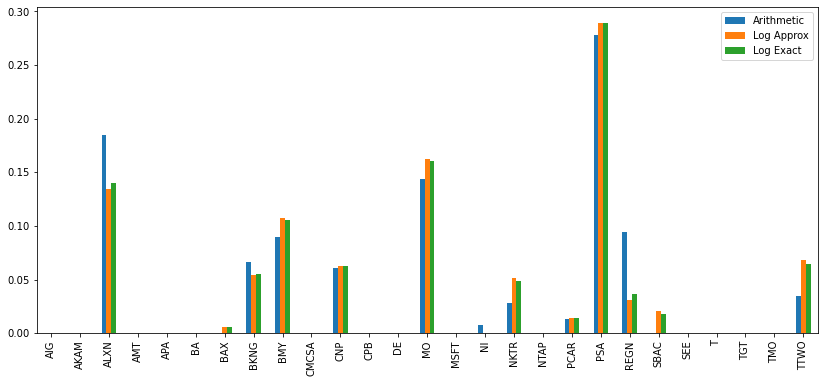

In [9]:
fig, ax = plt.subplots(figsize=(14,6))
w.plot(kind='bar', ax = ax)

In [10]:
returns = port.returns
cov = port.cov

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy()))
x = rk.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Risk Adjusted Return:")
print("Arithmetic", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy()))
x = rk.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Approx", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_3.to_numpy()))
x = rk.Sharpe_Risk(w_3, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Exact", (y/x).item() * 12**0.5)

Risk Adjusted Return:
Arithmetic 0.6691999480193228
Log Approx 0.6793044757466081
Log Exact 0.6794215276607808


### 3.2 Calculate efficient frontier

In [11]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, kelly="exact", points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AIG,AKAM,ALXN,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
0,0.0000%,0.3800%,3.6660%,0.0000%,0.0000%,0.0000%,3.0581%,5.0469%,20.2861%,0.0000%,...,0.0000%,0.0000%,23.9418%,0.0000%,5.4723%,0.0000%,0.2414%,0.0000%,1.8842%,7.1709%
1,0.0000%,0.0000%,12.7818%,0.0000%,0.0000%,0.0000%,0.8093%,4.9700%,13.1636%,0.0000%,...,0.0000%,0.8386%,28.7982%,1.3590%,2.9827%,0.0000%,0.0000%,0.0000%,0.0000%,7.2928%
2,0.0000%,0.0000%,14.1125%,0.0000%,0.0000%,0.0000%,0.4609%,5.6443%,9.9020%,0.0000%,...,0.0000%,1.5362%,28.9088%,4.1661%,1.5920%,0.0000%,0.0000%,0.0000%,0.0000%,6.3290%
3,0.0000%,0.0000%,14.1653%,0.0000%,0.0000%,0.0000%,0.0000%,6.1241%,6.9784%,0.0000%,...,0.0000%,2.5002%,28.8465%,5.9401%,1.1557%,0.0000%,0.0000%,0.0000%,0.0000%,6.1362%
4,0.0000%,0.0000%,13.8230%,0.0000%,0.0000%,0.0000%,0.0000%,6.6584%,4.0341%,0.0000%,...,0.0000%,3.8218%,28.6600%,7.2207%,0.9650%,0.0000%,0.0000%,0.0000%,0.0000%,6.2166%


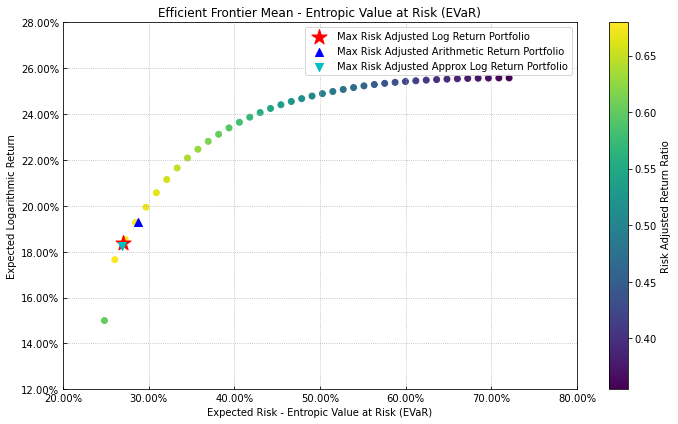

In [12]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Log Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

fig, ax = plt.subplots(figsize=(10,6))
plf.plot_frontier(w_frontier=frontier,
                       mu=mu,
                       cov=cov,
                       returns=returns,
                       rm=rm,
                       kelly=True,
                       rf=rf,
                       alpha=0.05,
                       cmap='viridis',
                       w=w_3,
                       label=label,
                       marker='*',
                       s=16,
                       c='r',
                       height=6,
                       width=10,
                       t_factor=12,
                       ax=ax)

y1 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy())) * 12
x1 = rk.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 12**0.5

y2 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy())) * 12
x2 = rk.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 12**0.5

ax.scatter(x=x1,
           y=y1,
           marker="^",
           s=8**2,
           c="b",
           label="Max Risk Adjusted Arithmetic Return Portfolio")
ax.scatter(x=x2,
           y=y2,
           marker="v",
           s=8**2,
           c="c",
           label="Max Risk Adjusted Approx Log Return Portfolio")
plt.legend()

## 3. Estimating Logarithmic Mean EDaR Portfolios

### 3.1 Calculating the portfolio that maximizes Risk Adjusted Return.

In [13]:
rm = 'EDaR' # Risk measure

w_1 = port.optimization(model=model, rm=rm, obj=obj, kelly=False, rf=rf, l=l, hist=hist)
w_2 = port.optimization(model=model, rm=rm, obj=obj, kelly='approx', rf=rf, l=l, hist=hist)
w_3 = port.optimization(model=model, rm=rm, obj=obj, kelly='exact', rf=rf, l=l, hist=hist)

w = pd.concat([w_1, w_2, w_3], axis=1)
w.columns = ['Arithmetic', 'Log Approx', 'Log Exact']

display(w)

,Arithmetic,Log Approx,Log Exact
AIG,0.0000%,0.0000%,0.0000%
AKAM,0.0000%,0.0001%,0.0000%
ALXN,0.0000%,4.1824%,3.1120%
AMT,2.8669%,0.1277%,0.2234%
APA,0.0000%,0.0005%,0.0000%
BA,0.0000%,0.0002%,0.0000%
BAX,0.0000%,0.0007%,0.0000%
BKNG,3.0492%,0.7226%,0.7547%
BMY,0.0000%,0.0009%,0.0000%
CMCSA,0.0000%,0.0004%,0.0000%


<AxesSubplot:>

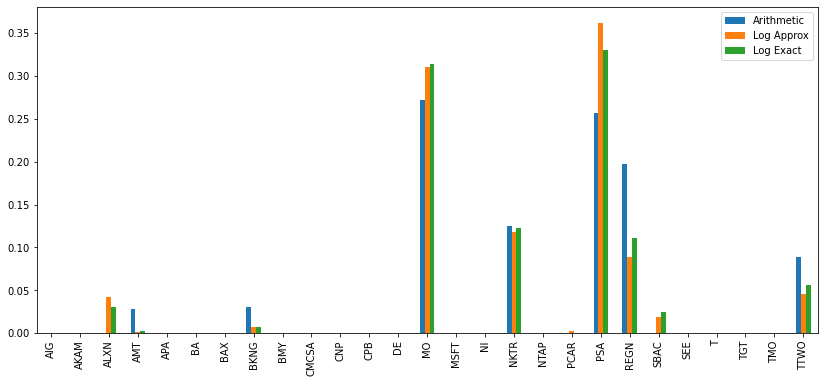

In [14]:
fig, ax = plt.subplots(figsize=(14,6))
w.plot(kind='bar', ax = ax)

In [15]:
returns = port.returns
cov = port.cov

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy()))
x = rk.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Risk Adjusted Return:")
print("Arithmetic", (y/x).item() * 12)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy()))
x = rk.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Approx", (y/x).item() * 12)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_3.to_numpy()))
x = rk.Sharpe_Risk(w_3, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Exact", (y/x).item() * 12)

Risk Adjusted Return:
Arithmetic 0.8286211415998024
Log Approx 0.846070950283653
Log Exact 0.8477024914731162


### 3.2 Calculate efficient frontier

In [16]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, kelly="exact", points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AIG,AKAM,ALXN,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
0,0.0000%,0.0000%,4.9566%,0.0000%,7.0827%,0.0000%,0.0000%,0.7697%,0.0000%,0.0000%,...,0.0000%,1.0086%,28.4287%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
1,0.0000%,0.0000%,9.1175%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,1.4921%,39.8202%,1.8910%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,3.6297%
2,0.0000%,0.0000%,5.2596%,0.8573%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.6313%,36.5955%,8.1015%,0.5015%,0.0000%,0.0000%,0.0000%,0.0000%,4.4582%
3,0.0000%,0.0000%,3.2296%,0.2013%,0.0000%,0.0000%,0.0000%,0.7193%,0.0000%,0.0000%,...,0.0000%,0.0000%,33.1989%,10.9634%,2.4576%,0.0000%,0.0000%,0.0000%,0.0000%,5.5881%
4,0.0000%,0.0000%,0.7741%,0.6800%,0.0000%,0.0000%,0.0000%,1.4780%,0.0000%,0.0000%,...,0.0000%,0.0000%,28.9304%,14.1497%,3.2846%,0.0000%,0.0000%,0.0000%,0.0000%,6.2098%


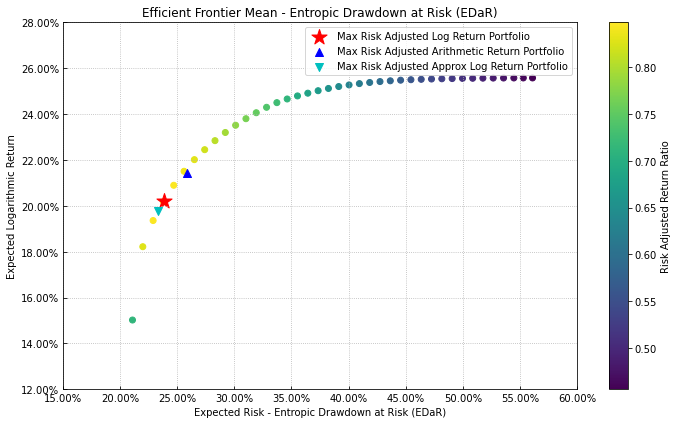

In [17]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Log Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

fig, ax = plt.subplots(figsize=(10,6))
plf.plot_frontier(w_frontier=frontier,
                       mu=mu,
                       cov=cov,
                       returns=returns,
                       rm=rm,
                       kelly=True,
                       rf=rf,
                       alpha=0.05,
                       cmap='viridis',
                       w=w_3,
                       label=label,
                       marker='*',
                       s=16,
                       c='r',
                       height=6,
                       width=10,
                       t_factor=12,
                       ax=ax)

y1 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy())) * 12
x1 = rk.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)

y2 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy())) * 12
x2 = rk.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)

ax.scatter(x=x1,
           y=y1,
           marker="^",
           s=8**2,
           c="b",
           label="Max Risk Adjusted Arithmetic Return Portfolio")
ax.scatter(x=x2,
           y=y2,
           marker="v",
           s=8**2,
           c="c",
           label="Max Risk Adjusted Approx Log Return Portfolio")
plt.legend()